In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
file_path = '/content/IEA Global EV Data 2024.csv'
df = pd.read_csv(file_path)

In [4]:
# Display basic information about the dataset
print("Basic Information:")
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB
None


In [5]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [6]:
# Check for and handle missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64


In [7]:
df = df.dropna()

In [8]:
# Convert columns to appropriate datatypes if necessary
df['year'] = df['year'].astype(int)


In [9]:
# Descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())



Descriptive statistics:
               year         value
count  12654.000000  1.265400e+04
mean    2019.822112  4.273742e+05
std        5.476494  6.860498e+06
min     2010.000000  1.200000e-06
25%     2016.000000  2.000000e+00
50%     2020.000000  1.300000e+02
75%     2022.000000  5.500000e+03
max     2035.000000  4.400000e+08


In [10]:
# Total sales by region
total_sales_by_region = df.groupby('region')['value'].sum()
print("\nTotal Sales by Region:")
print(total_sales_by_region)


Total Sales by Region:
region
Australia               5.917191e+05
Austria                 9.156697e+05
Belgium                 1.791753e+06
Brazil                  2.732338e+05
Bulgaria                4.636790e+03
Canada                  2.527226e+06
Chile                   1.738773e+04
China                   1.234572e+09
Colombia                1.603157e+04
Costa Rica              2.765728e+04
Croatia                 7.572710e+03
Cyprus                  2.277490e+03
Czech Republic          3.431612e+04
Denmark                 1.167352e+06
EU27                    3.527300e+07
Estonia                 4.605510e+03
Europe                  6.134628e+08
Finland                 7.813675e+05
France                  7.189074e+06
Germany                 1.057623e+07
Greece                  1.152414e+05
Hungary                 4.207123e+04
Iceland                 1.944133e+05
India                   6.745700e+07
Indonesia               1.705000e+03
Ireland                 8.864976e+04
Israel 

In [11]:
# Average sales by powertrain
average_sales_by_powertrain = df.groupby('powertrain')['value'].mean()
print("\nAverage Sales by Powertrain:")
print(average_sales_by_powertrain)


Average Sales by Powertrain:
powertrain
BEV                        1.270063e+06
EV                         4.433324e+03
FCEV                       2.449094e+04
PHEV                       4.834375e+05
Publicly available fast    2.054606e+05
Publicly available slow    3.427856e+05
Name: value, dtype: float64


In [12]:
# Correlation Matrix for numeric columns
correlation_matrix = df[['value', 'year']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          value      year
value  1.000000  0.120782
year   0.120782  1.000000


In [13]:
# Total sales by year and mode
total_sales_by_mode_and_year = df.groupby(['year', 'mode'])['value'].sum().reset_index()
print("\nTotal Sales by Mode and Year:")
print(total_sales_by_mode_and_year)



Total Sales by Mode and Year:
    year    mode         value
0   2010   Buses  2.219873e+04
1   2010    Cars  7.097872e+04
2   2010      EV  1.850000e+04
3   2010  Trucks  5.394611e+03
4   2010    Vans  3.063712e+04
..   ...     ...           ...
80  2035   Buses  2.656029e+07
81  2035    Cars  2.284445e+09
82  2035      EV  9.494800e+07
83  2035  Trucks  6.382609e+07
84  2035    Vans  1.674995e+08

[85 rows x 3 columns]


In [14]:
# Total sales by year and category
total_sales_by_category_and_year = df.groupby(['year', 'category'])['value'].sum().reset_index()
print("\nTotal Sales by Category and Year:")
print(total_sales_by_category_and_year)


Total Sales by Category and Year:
    year          category         value
0   2010        Historical  1.477092e+05
1   2011        Historical  3.926084e+05
2   2012        Historical  9.672729e+05
3   2013        Historical  1.786319e+06
4   2014        Historical  3.103426e+06
5   2015        Historical  5.739548e+06
6   2016        Historical  8.897600e+06
7   2017        Historical  1.357305e+07
8   2018        Historical  2.077615e+07
9   2019        Historical  2.733378e+07
10  2020        Historical  4.012093e+07
11  2020    Projection-APS  3.176252e+07
12  2020  Projection-STEPS  3.176252e+07
13  2021        Historical  6.750942e+07
14  2021    Projection-APS  5.315062e+07
15  2021  Projection-STEPS  5.315062e+07
16  2022        Historical  1.025684e+08
17  2022    Projection-APS  8.319458e+07
18  2022  Projection-STEPS  8.319458e+07
19  2023        Historical  1.486479e+08
20  2023    Projection-APS  1.220299e+08
21  2023  Projection-STEPS  1.220299e+08
22  2025    Projection

In [15]:
# Create a pivot table
pivot_table = df.pivot_table(index='year', columns='category', values='value', aggfunc='sum')
print("\nPivot Table:")
print(pivot_table)


Pivot Table:
category    Historical  Projection-APS  Projection-STEPS
year                                                    
2010      1.477092e+05             NaN               NaN
2011      3.926084e+05             NaN               NaN
2012      9.672729e+05             NaN               NaN
2013      1.786319e+06             NaN               NaN
2014      3.103426e+06             NaN               NaN
2015      5.739548e+06             NaN               NaN
2016      8.897600e+06             NaN               NaN
2017      1.357305e+07             NaN               NaN
2018      2.077615e+07             NaN               NaN
2019      2.733378e+07             NaN               NaN
2020      4.012093e+07    3.176252e+07      3.176252e+07
2021      6.750942e+07    5.315062e+07      5.315062e+07
2022      1.025684e+08    8.319458e+07      8.319458e+07
2023      1.486479e+08    1.220299e+08      1.220299e+08
2025               NaN    2.286911e+08      2.239590e+08
2030             

In [17]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('/content/IEA Global EV Data 2024.csv')

# Interactive line plot of sales over time
fig = px.line(df, x='year', y='value', color='category',
              title='Global EV Sales Over Time',
              labels={'year': 'Year', 'value': 'Sales Value'})
fig.show()

In [18]:
# Aggregate sales by region
sales_by_region = df.groupby('region')['value'].sum().reset_index()

# Interactive bar plot
fig = px.bar(sales_by_region, x='region', y='value',
             title='Total Sales by Region',
             labels={'region': 'Region', 'value': 'Total Sales Value'})
fig.show()

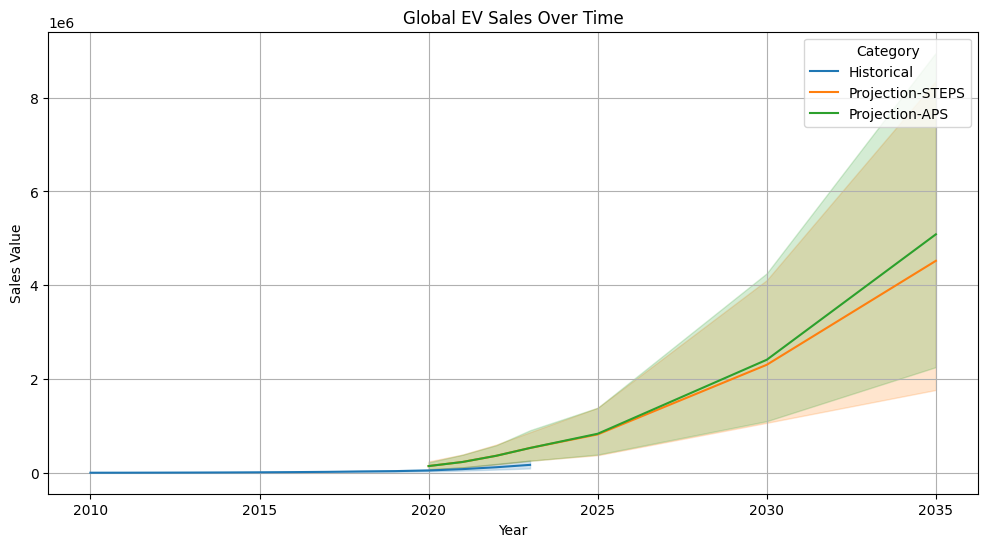

In [24]:
# Line plot of sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='value', hue='category')
plt.title('Global EV Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Sales Value')
plt.legend(title='Category')
plt.grid(True)
plt.show()

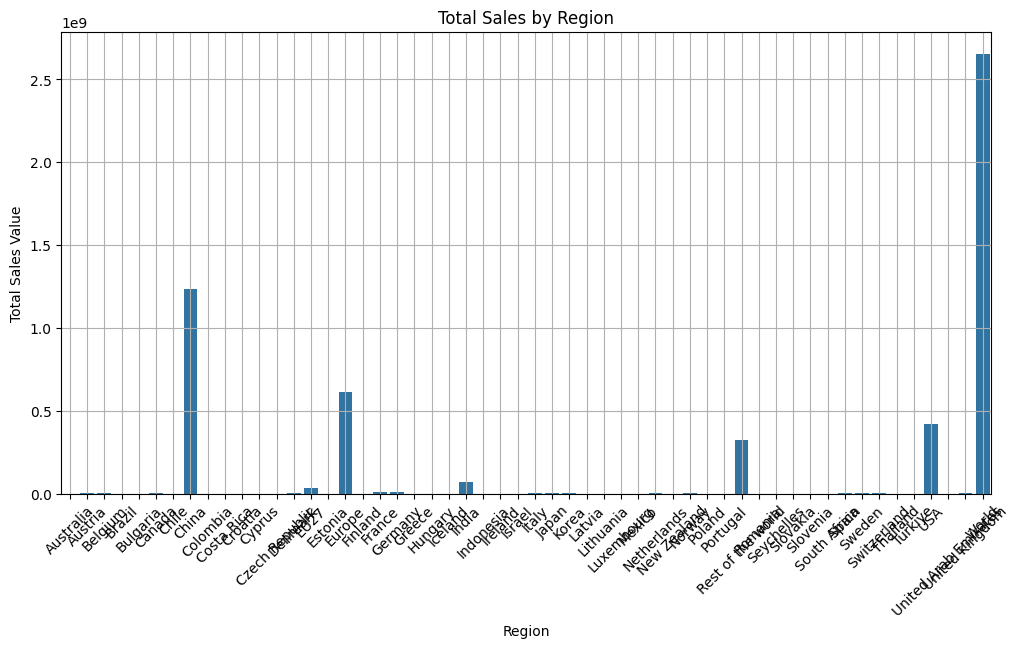

In [25]:
# Bar plot of sales by region
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_region, x='region', y='value')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

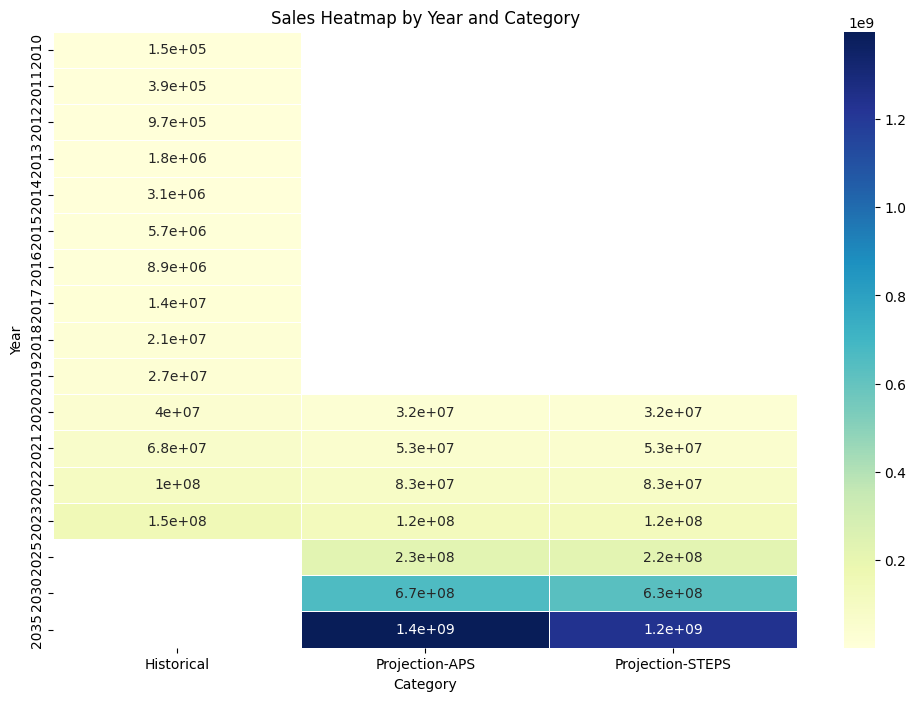

In [26]:
# Heatmap of sales by year and category
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Sales Heatmap by Year and Category')
plt.xlabel('Category')
plt.ylabel('Year')
plt.show()

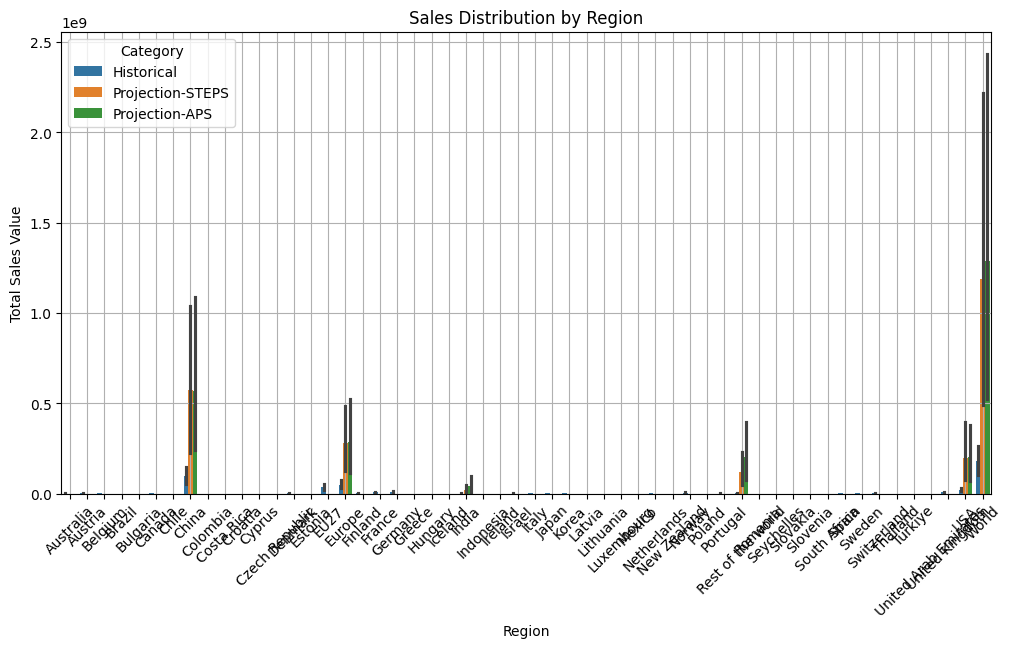

In [31]:
# Sales distribution by region
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='region', y='value', hue='category', estimator='sum')
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)
plt.show()


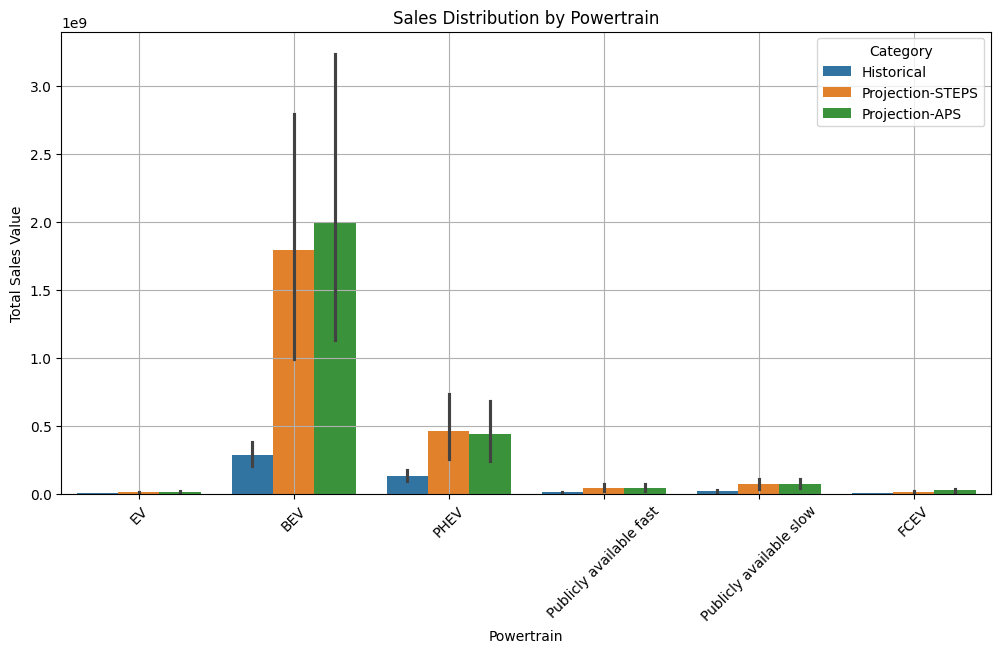

In [32]:
# Sales distribution by powertrain
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='powertrain', y='value', hue='category', estimator='sum')
plt.title('Sales Distribution by Powertrain')
plt.xlabel('Powertrain')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)
plt.show()

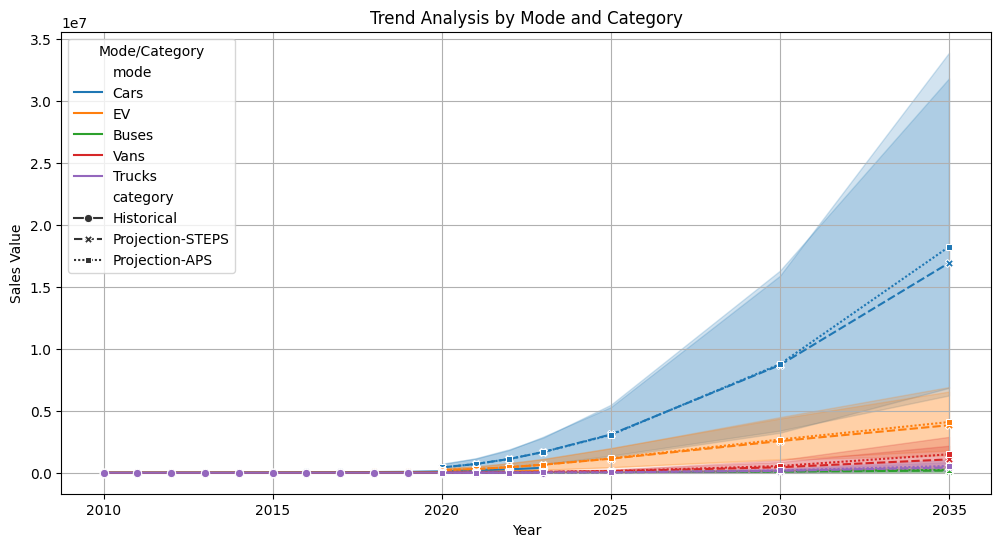

In [33]:
# Trend analysis by mode and category
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='value', hue='mode', style='category', markers=True)
plt.title('Trend Analysis by Mode and Category')
plt.xlabel('Year')
plt.ylabel('Sales Value')
plt.legend(title='Mode/Category')
plt.grid(True)
plt.show()

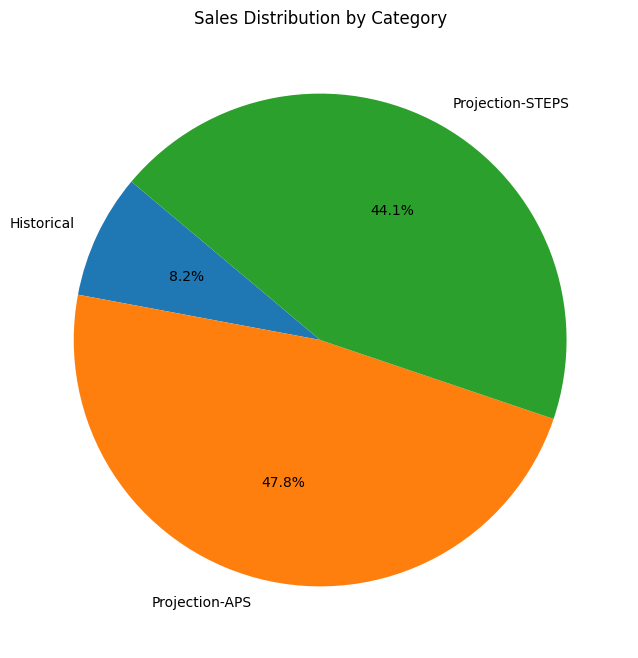

In [35]:
# Aggregate sales by category
sales_by_category = df.groupby('category')['value'].sum()

# Pie chart of sales distribution by category
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Category')
plt.show()

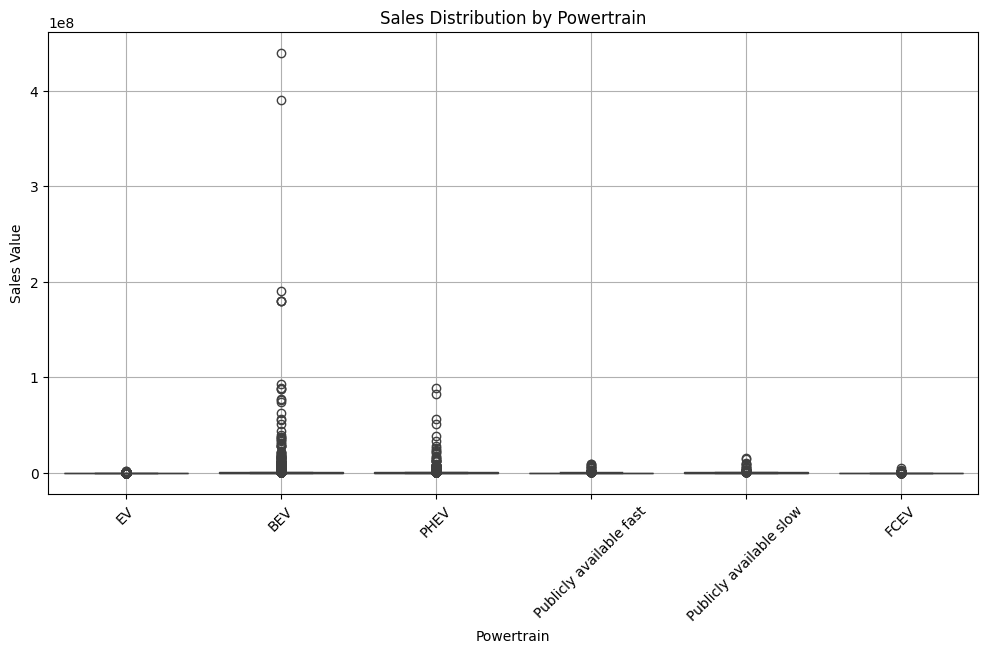

In [36]:
# Box plot of sales distribution by powertrain
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='powertrain', y='value')
plt.title('Sales Distribution by Powertrain')
plt.xlabel('Powertrain')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [38]:
# Aggregate sales by region and category
sales_by_region_category = df.groupby(['region', 'category'])['value'].sum().reset_index()

# Interactive sunburst chart
fig = px.sunburst(sales_by_region_category, path=['region', 'category'], values='value',
                  title='Sales Distribution by Region and Category',
                  labels={'value': 'Total Sales Value'})
fig.show()

In [39]:
# Interactive bubble chart of sales by year and powertrain
fig = px.scatter(df, x='year', y='value', size='value', color='powertrain',
                 title='Sales by Year and Powertrain',
                 labels={'year': 'Year', 'value': 'Sales Value', 'powertrain': 'Powertrain'})
fig.show()


Pivot Table:
category    Historical  Projection-APS  Projection-STEPS
year                                                    
2010      1.477092e+05             NaN               NaN
2011      3.926084e+05             NaN               NaN
2012      9.672729e+05             NaN               NaN
2013      1.786319e+06             NaN               NaN
2014      3.103426e+06             NaN               NaN
2015      5.739548e+06             NaN               NaN
2016      8.897600e+06             NaN               NaN
2017      1.357305e+07             NaN               NaN
2018      2.077615e+07             NaN               NaN
2019      2.733378e+07             NaN               NaN
2020      4.012093e+07    3.176252e+07      3.176252e+07
2021      6.750942e+07    5.315062e+07      5.315062e+07
2022      1.025684e+08    8.319458e+07      8.319458e+07
2023      1.486479e+08    1.220299e+08      1.220299e+08
2025               NaN    2.286911e+08      2.239590e+08
2030             

<Figure size 1200x600 with 0 Axes>

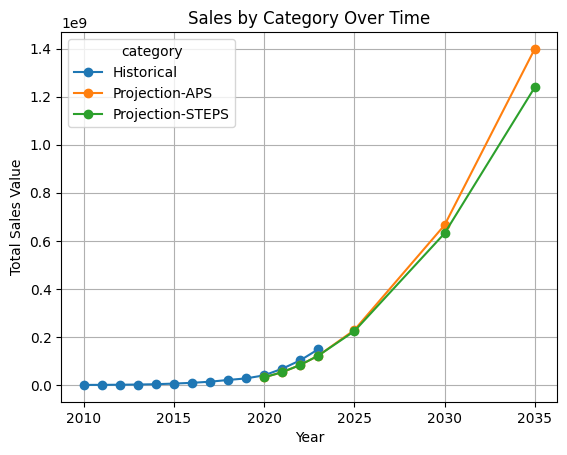

In [44]:
# Pivot table to analyze sales over years and categories
pivot_table = df.pivot_table(index='year', columns='category', values='value', aggfunc='sum')
print("\nPivot Table:")
print(pivot_table)

plt.figure(figsize=(12, 6))
pivot_table.plot(kind='line', marker='o')
plt.title('Sales by Category Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales Value')
plt.grid(True)
plt.show()